In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=1000)
data = {
    "Open": np.random.uniform(100, 200, size=1000),
    "High": np.random.uniform(150, 250, size=1000),
    "Low": np.random.uniform(50, 150, size=1000),
    "Close": np.random.uniform(100, 200, size=1000),
    "Volume": np.random.randint(1_000_000, 10_000_000, size=1000),
}
stock_data = pd.DataFrame(data, index=dates)
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()
stock_data = stock_data.dropna()
print("Sample of the dummy dataset:")
print(stock_data.head())

Sample of the dummy dataset:
                  Open        High         Low       Close   Volume  \
2020-07-18  177.987555  163.008624   88.040055  139.273074  9658123   
2020-07-19  164.203165  225.826320  147.680033  155.337119  6981804   
2020-07-20  108.413996  152.458692   61.072059  150.313247  8583491   
2020-07-21  116.162871  152.212355   92.254843  119.386307  1671986   
2020-07-22  189.855419  182.361022   54.202468  185.881677  9526508   

                  MA50       MA200  
2020-07-18  147.586903  148.711110  
2020-07-19  147.433151  148.651444  
2020-07-20  147.942649  148.504669  
2020-07-21  146.919453  148.476367  
2020-07-22  147.781884  148.593338  


In [7]:
X = stock_data[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']]
y = stock_data['Close']

In [9]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")


Mean Squared Error: 929.1985021640724


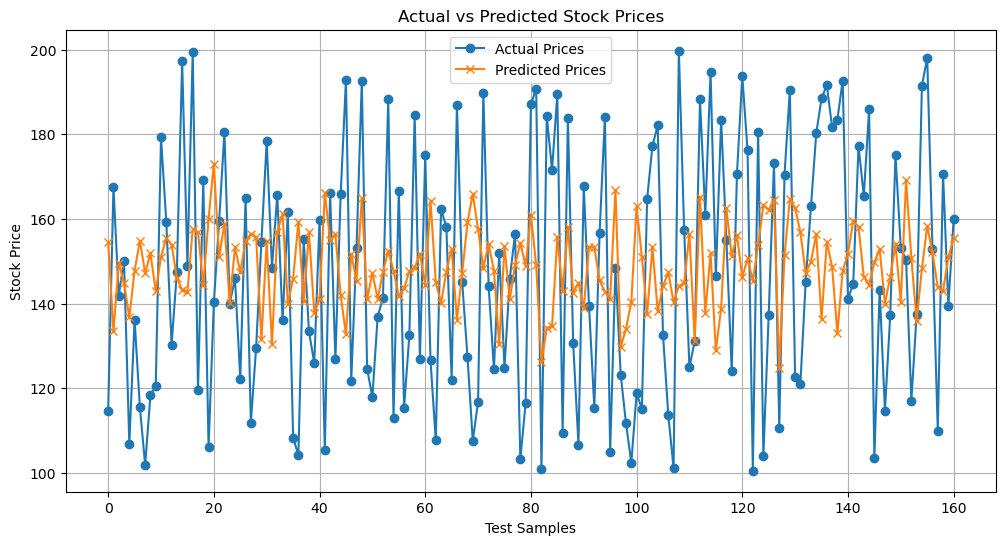

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', marker='o')
plt.plot(y_pred, label='Predicted Prices', marker='x')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Test Samples")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()